In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Loading Dataset
data = pd.read_csv('Fraud_check.csv')

EDA & Data Preprocessing

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.sample(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
576,YES,Married,50242,79653,15,YES
284,NO,Divorced,15673,188383,22,YES
447,NO,Married,83061,166606,5,YES
51,YES,Single,40137,174042,30,NO
450,YES,Divorced,78728,91936,8,YES
400,YES,Married,62494,197421,16,NO
26,YES,Divorced,55299,169128,15,NO
481,YES,Single,62998,120012,13,NO
195,YES,Single,86079,181370,13,YES
62,NO,Divorced,91684,147684,13,YES


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [9]:
# Renaming columns
data = data.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
data.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


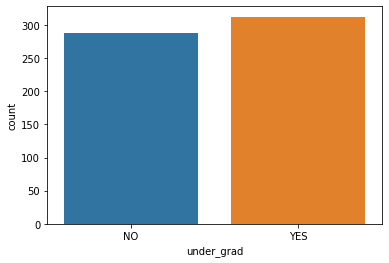

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


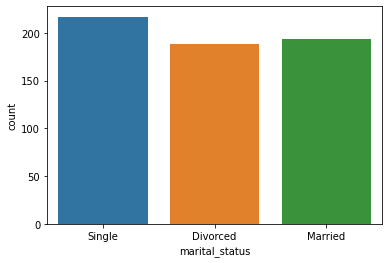

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


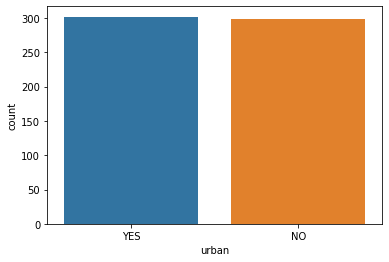

In [10]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(data['under_grad'])
plt.show()

sns.countplot(data['marital_status'])
plt.show()

sns.countplot(data['urban'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


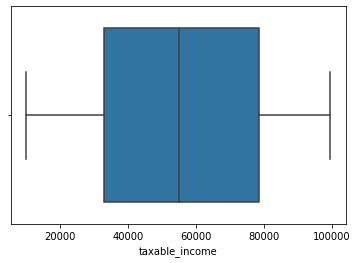

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


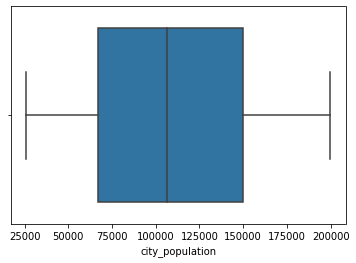

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


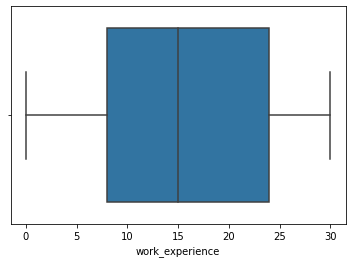

In [11]:
# Checking for outliers in numerical data
sns.boxplot(data['taxable_income'])
plt.show()

sns.boxplot(data['city_population'])
plt.show()

sns.boxplot(data['work_experience'])
plt.show()

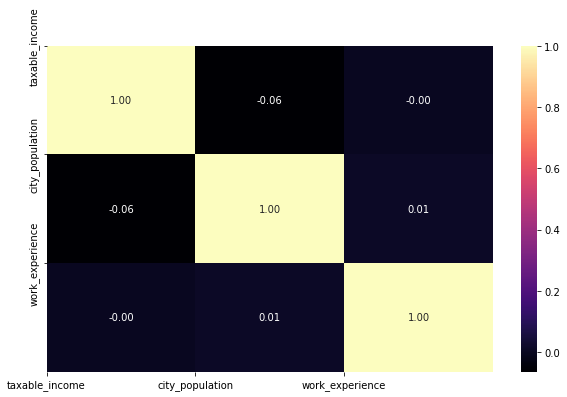

In [12]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [13]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data['taxable_category'] = pd.cut(x = data['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


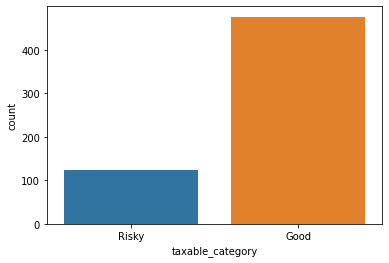

In [14]:
sns.countplot(data['taxable_category'])

In [15]:
data['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [16]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['under_grad'] = label_encoder.fit_transform(data['under_grad'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['urban'] = label_encoder.fit_transform(data['urban'])
data['taxable_category'] = label_encoder.fit_transform(data['taxable_category'])
data.sample(10)

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
267,0,2,29046,183946,11,0,1
214,0,0,80618,140159,16,0,0
363,1,2,21696,52584,7,1,1
412,1,2,81378,28446,11,0,0
79,0,0,10329,140885,7,1,1
362,1,0,16320,75552,17,1,1
261,0,2,70645,68788,7,1,0
176,0,1,38704,75169,28,0,0
427,0,0,76700,99025,10,0,0
156,1,1,39114,125987,3,1,0


In [17]:
# dropping column taxable_income
data1 = data.drop('taxable_income', axis = 1)
data1

,under_grad,marital_status,city_population,work_experience,urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


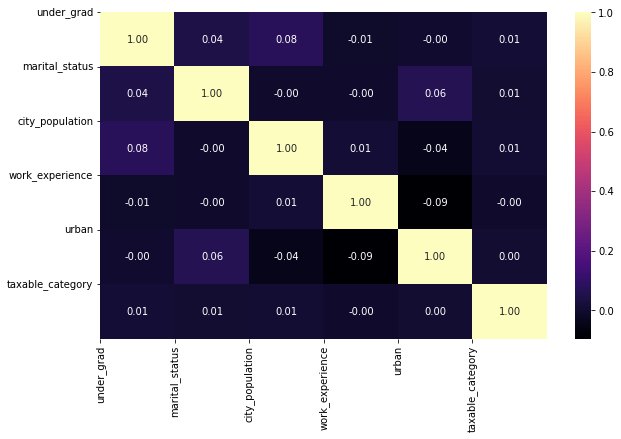

In [18]:
# Correlation analysis for data11
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [19]:
# Dividing data into independent variables and dependent variable
X = data1.drop('taxable_category', axis = 1)
y = data1['taxable_category']

In [20]:
X

,under_grad,marital_status,city_population,work_experience,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: int64

In [22]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [23]:
x_train

,under_grad,marital_status,city_population,work_experience,urban
108,1,1,120894,10,1
272,0,2,126488,1,1
599,0,0,158137,16,0
479,1,1,68995,21,0
436,0,0,158057,4,1
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [24]:
y_train

108    0
272    0
599    0
479    0
436    0
      ..
71     0
106    1
270    0
435    0
102    0
Name: taxable_category, Length: 420, dtype: int64

In [25]:
x_test

,under_grad,marital_status,city_population,work_experience,urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
54,0,0,98207,23,0
493,0,1,103226,29,0
46,1,1,137346,27,1
93,1,1,137676,3,1


In [26]:
y_test

110    1
419    0
565    0
77     0
181    1
      ..
54     0
493    1
46     0
93     1
264    0
Name: taxable_category, Length: 180, dtype: int64

Building model based on C5.0 Algorithm

In [27]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

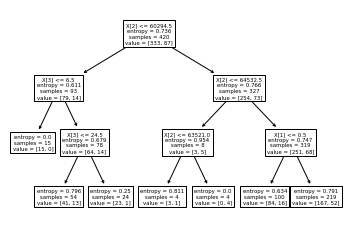

In [28]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [29]:
data1.columns

Index(['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category'],
      dtype='object')

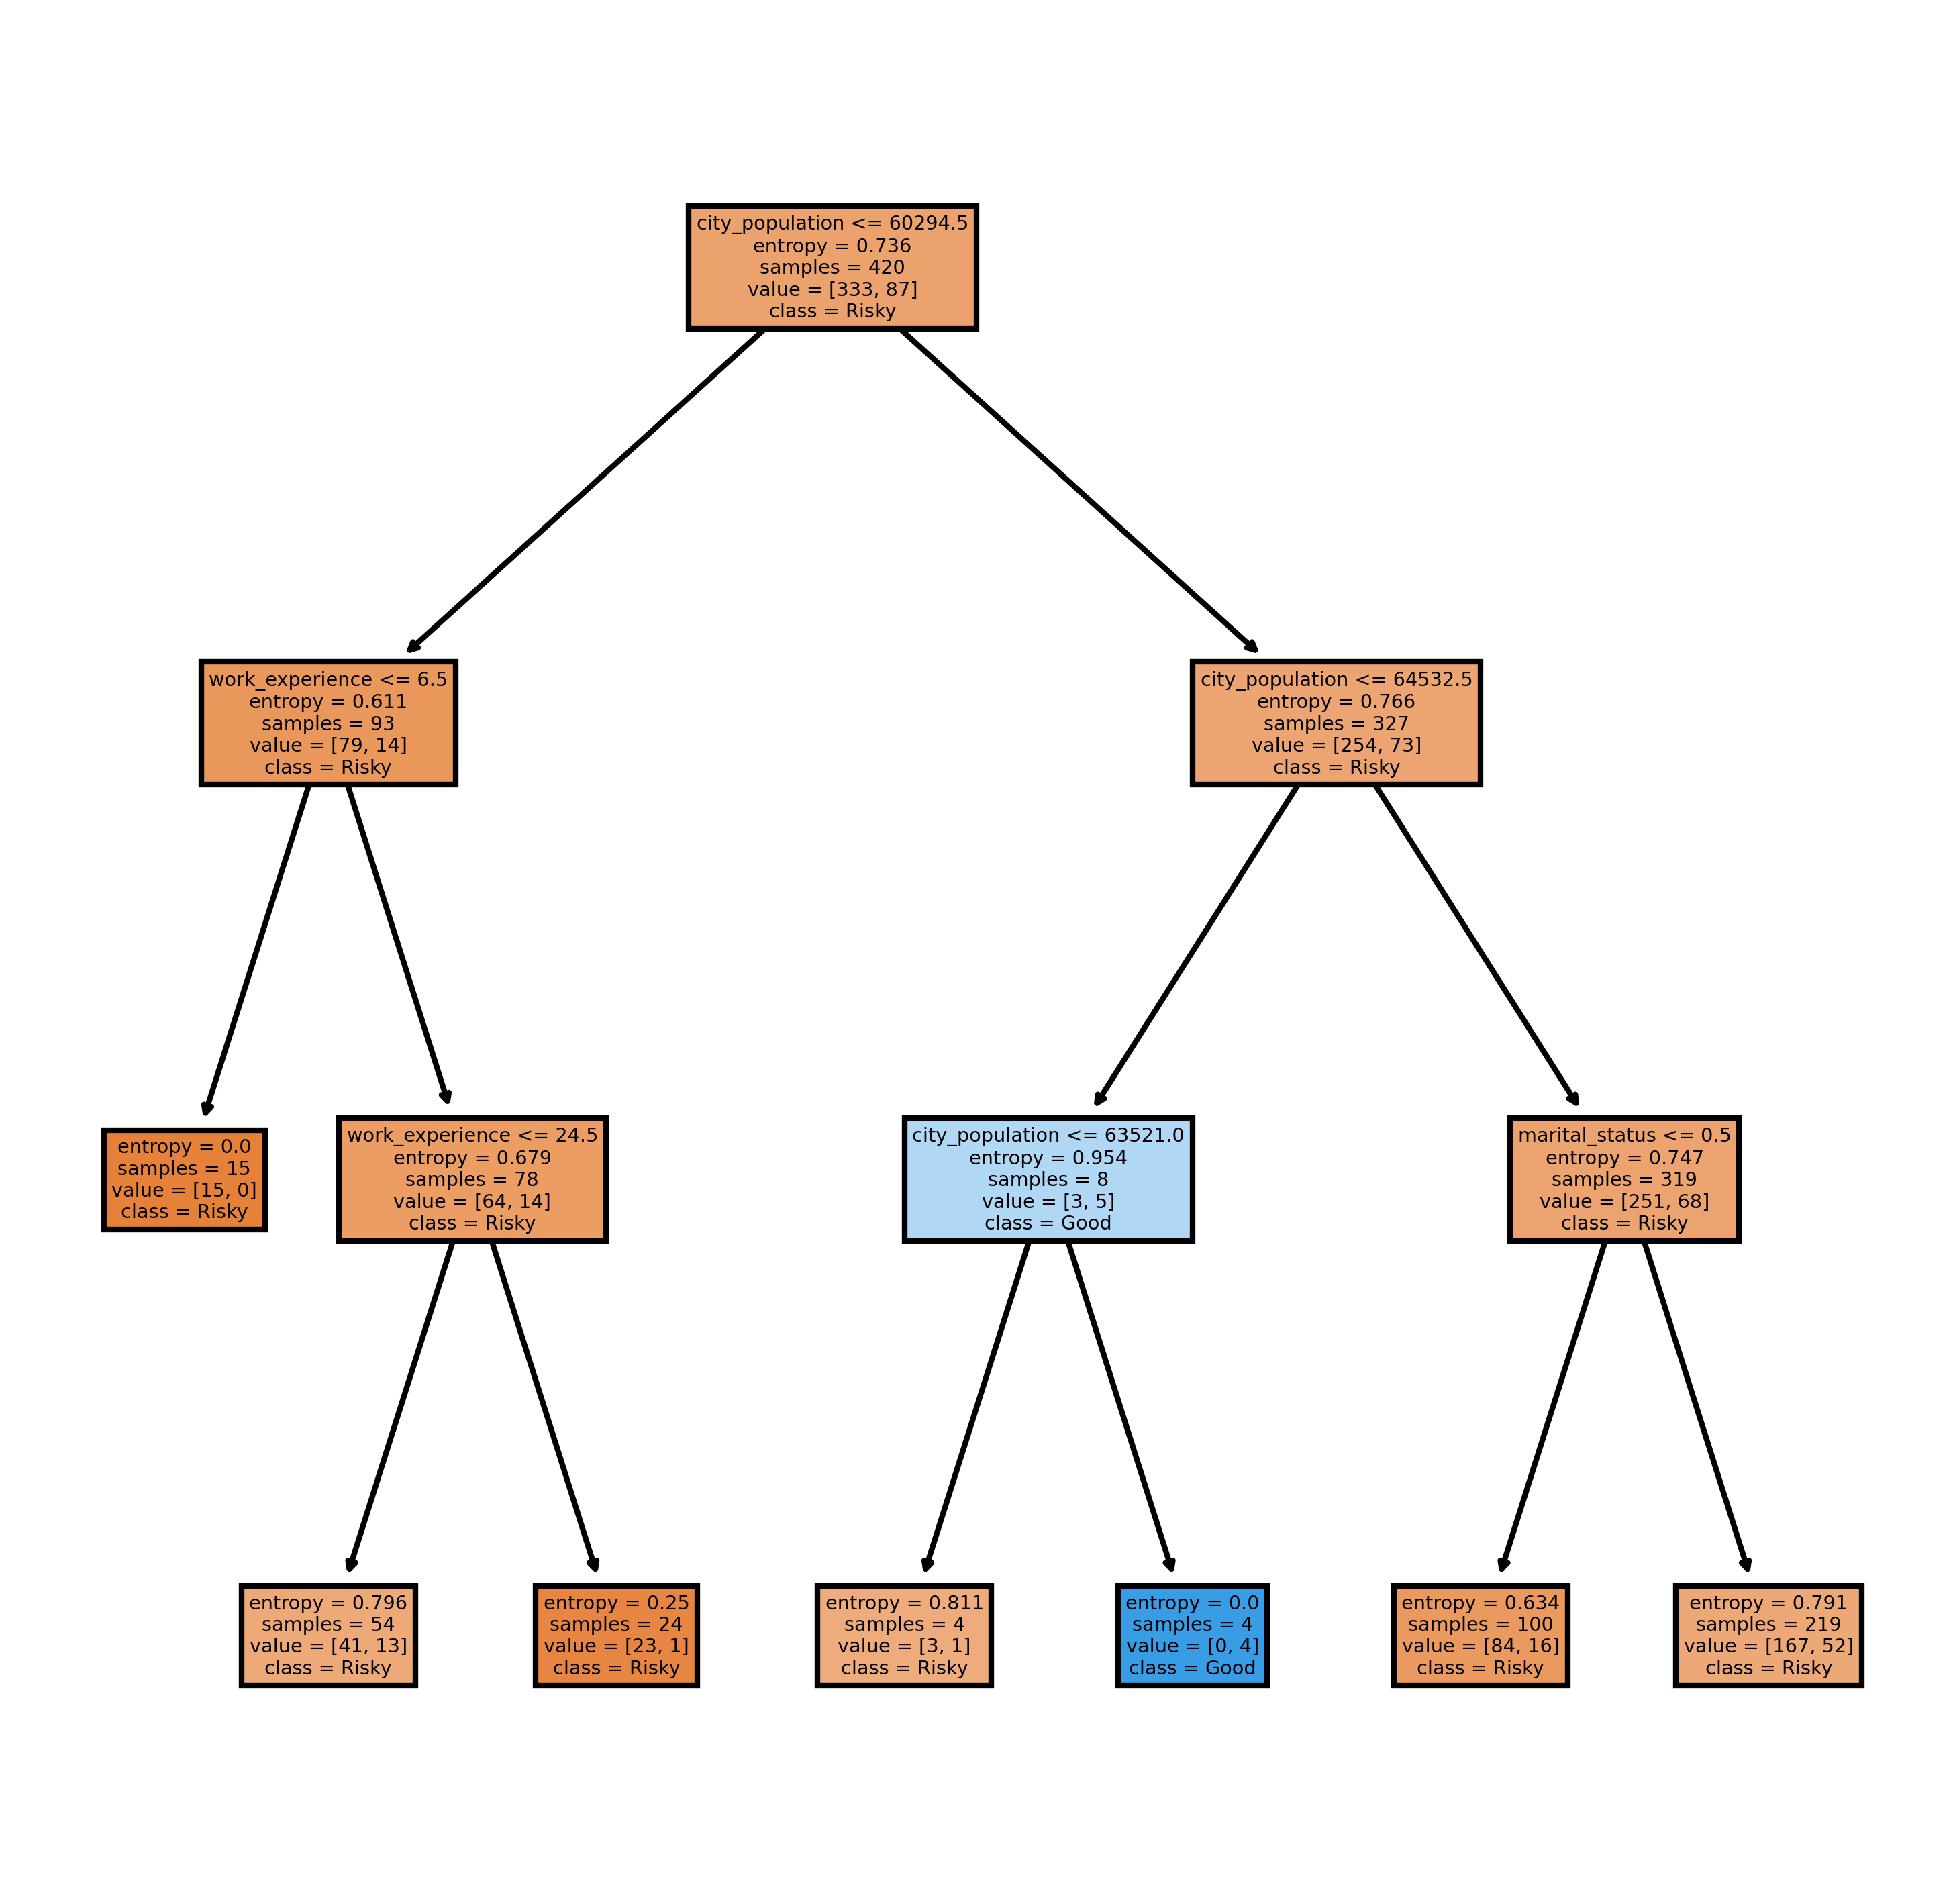

In [30]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [31]:
# Predicting Data
pred = model_c5.predict(x_test)
pd.Series(pred).value_counts()

0    179
1      1
dtype: int64

In [32]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [33]:
# Creating cross tables for checking model
pd.crosstab(y_test, pred)

col_0,0,1
taxable_category,,
0,142,1
1,37,0


In [34]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.7888888888888889

Building model based on CART Algorithm

In [35]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

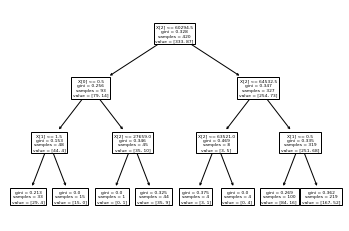

In [36]:
# Plotting Decision tree
tree.plot_tree(model_CART);

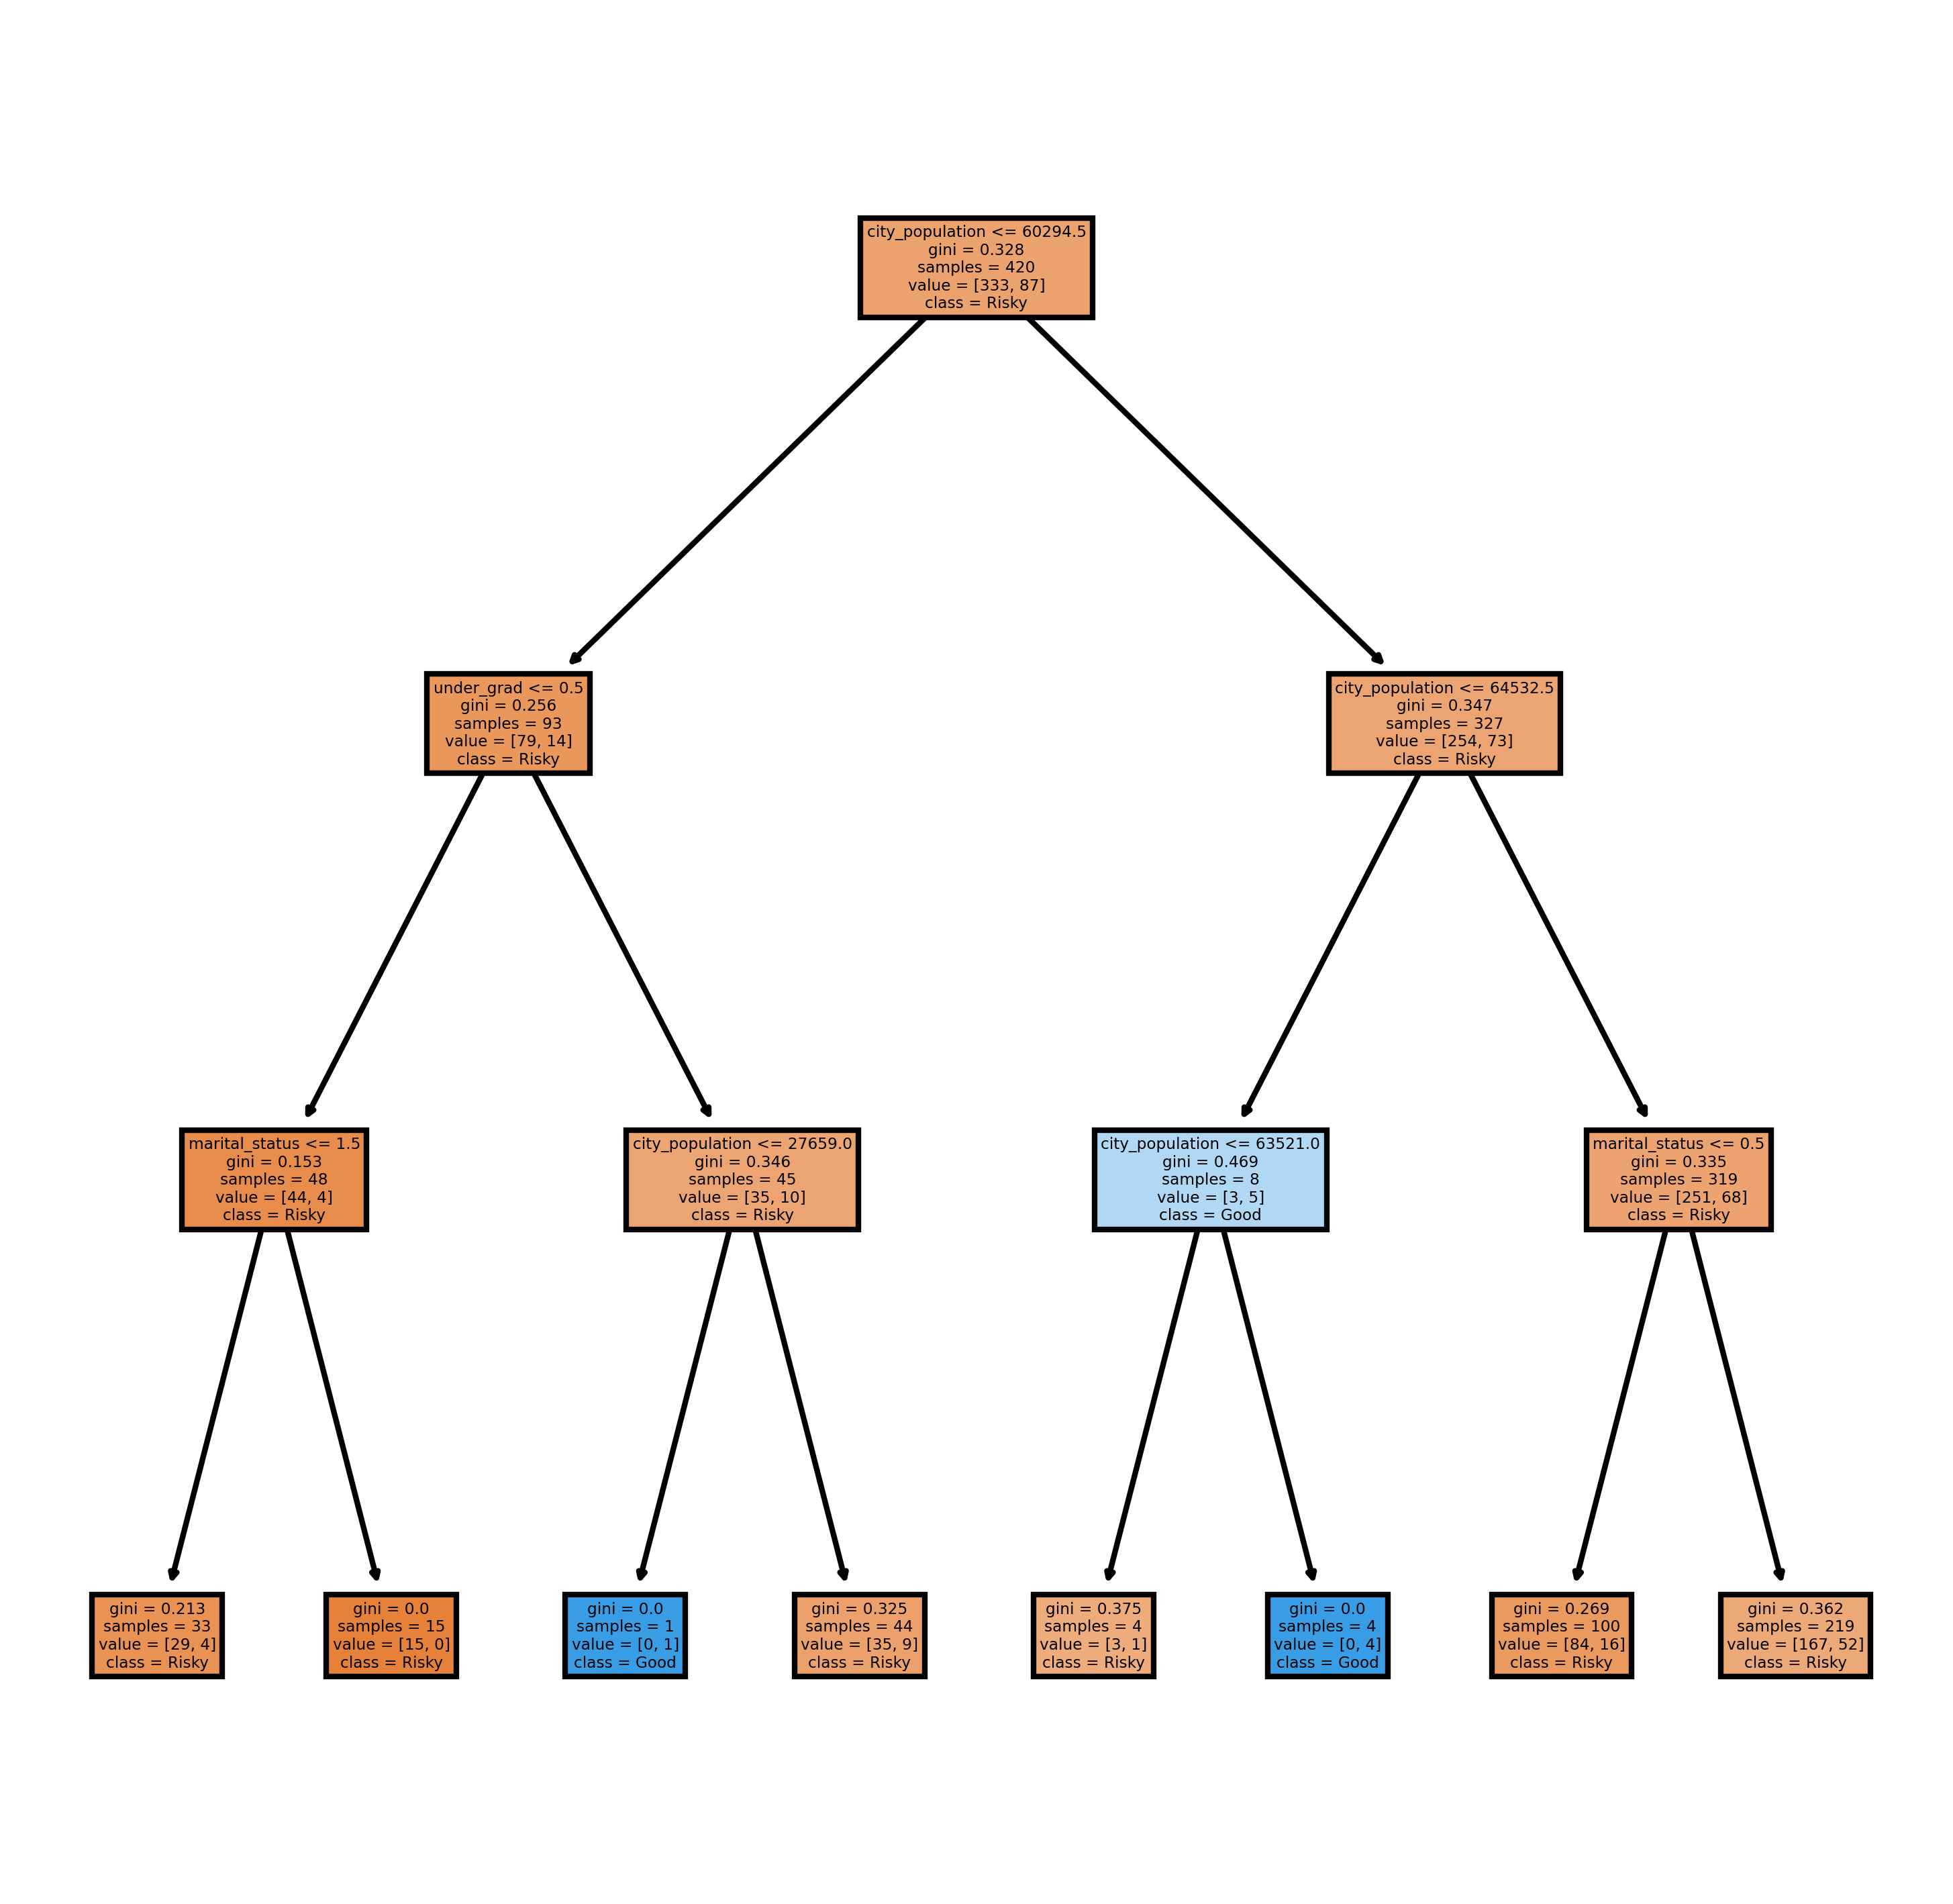

In [37]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

0    179
1      1
dtype: int64

In [39]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [40]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,142,1
1,37,0


In [41]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.7888888888888889